<div style="border-radius:10px;
            border : black solid;
            background-color: ##FFFFFF;
            font-size:200%;
            text-align: left">

<h1 style='; border:0; border-radius: 10px; text-shadow: 1px 1px black; font-weight: bold; color:orange'><center> HOUSE PRICES PREDICTION </center></h1>

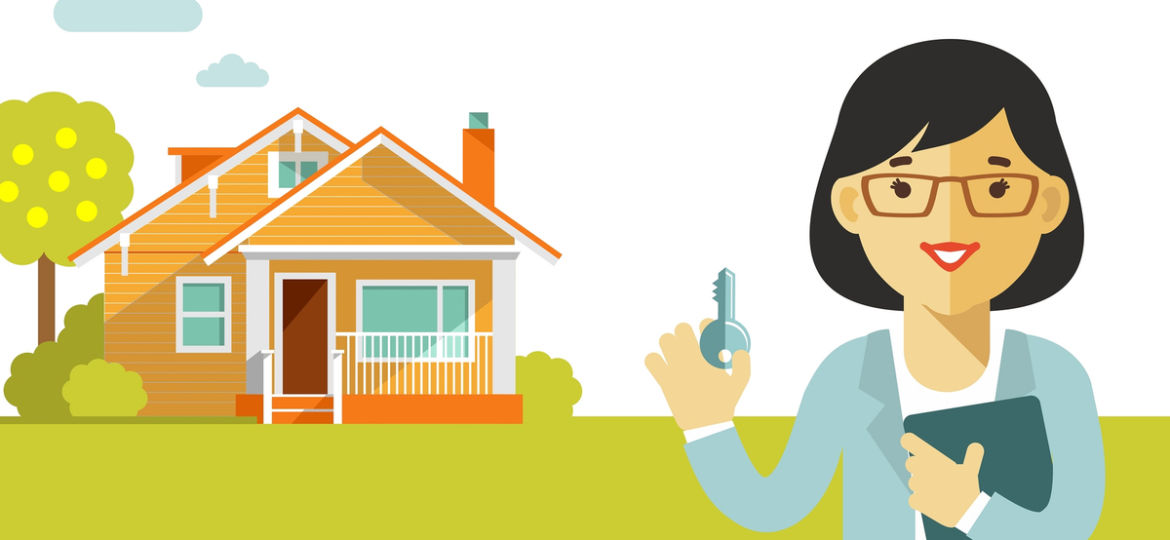

#### IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import scipy.stats as st
import math
import missingno as msno
from scipy.stats import norm, skew
from collections import Counter
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.pipeline import make_pipeline

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from mlxtend.regressor import StackingCVRegressor

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#to see model hyperparameters
from sklearn import set_config
set_config(print_changed_only = False)

# to show all columns
pd.set_option('display.max_columns', 82)

#### LOAD DATASETS

In [2]:
train_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

#### GET INFORMATION ABOUT TRAIN DATASET

In [3]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
print("The number of rows in train data is {0}, and the number of columns in train data is {1}".
      format(train_df.shape[0], train_df.shape[1]))
      
print("The number of rows in test data is {0}, and the number of columns in test data is {1}".
      format(test_df.shape[0], test_df.shape[1]))

The number of rows in train data is 1460, and the number of columns in train data is 81
The number of rows in test data is 1459, and the number of columns in test data is 80


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<div style="border-radius:10px;
            border : black solid;
            background-color: 	#00000;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Null values</center></h4>
    
● It turns out that the train dataset has a lot of null values.    
● The train dataset consists of 1460 rows and 81 columns.    
● Of the variables, 3 are object, 35 are integer and 43 are float

In [6]:
train_df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

<div style="border-radius:10px;
            border : black solid;
            background-color:#EEFD00;
            font-size:110%;
            text-align: left">

<h2 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Visualizations of some variables</center></h2>
    
Here we will visualize (univariate, bivariate, multivariate) some variables of the train dataset.

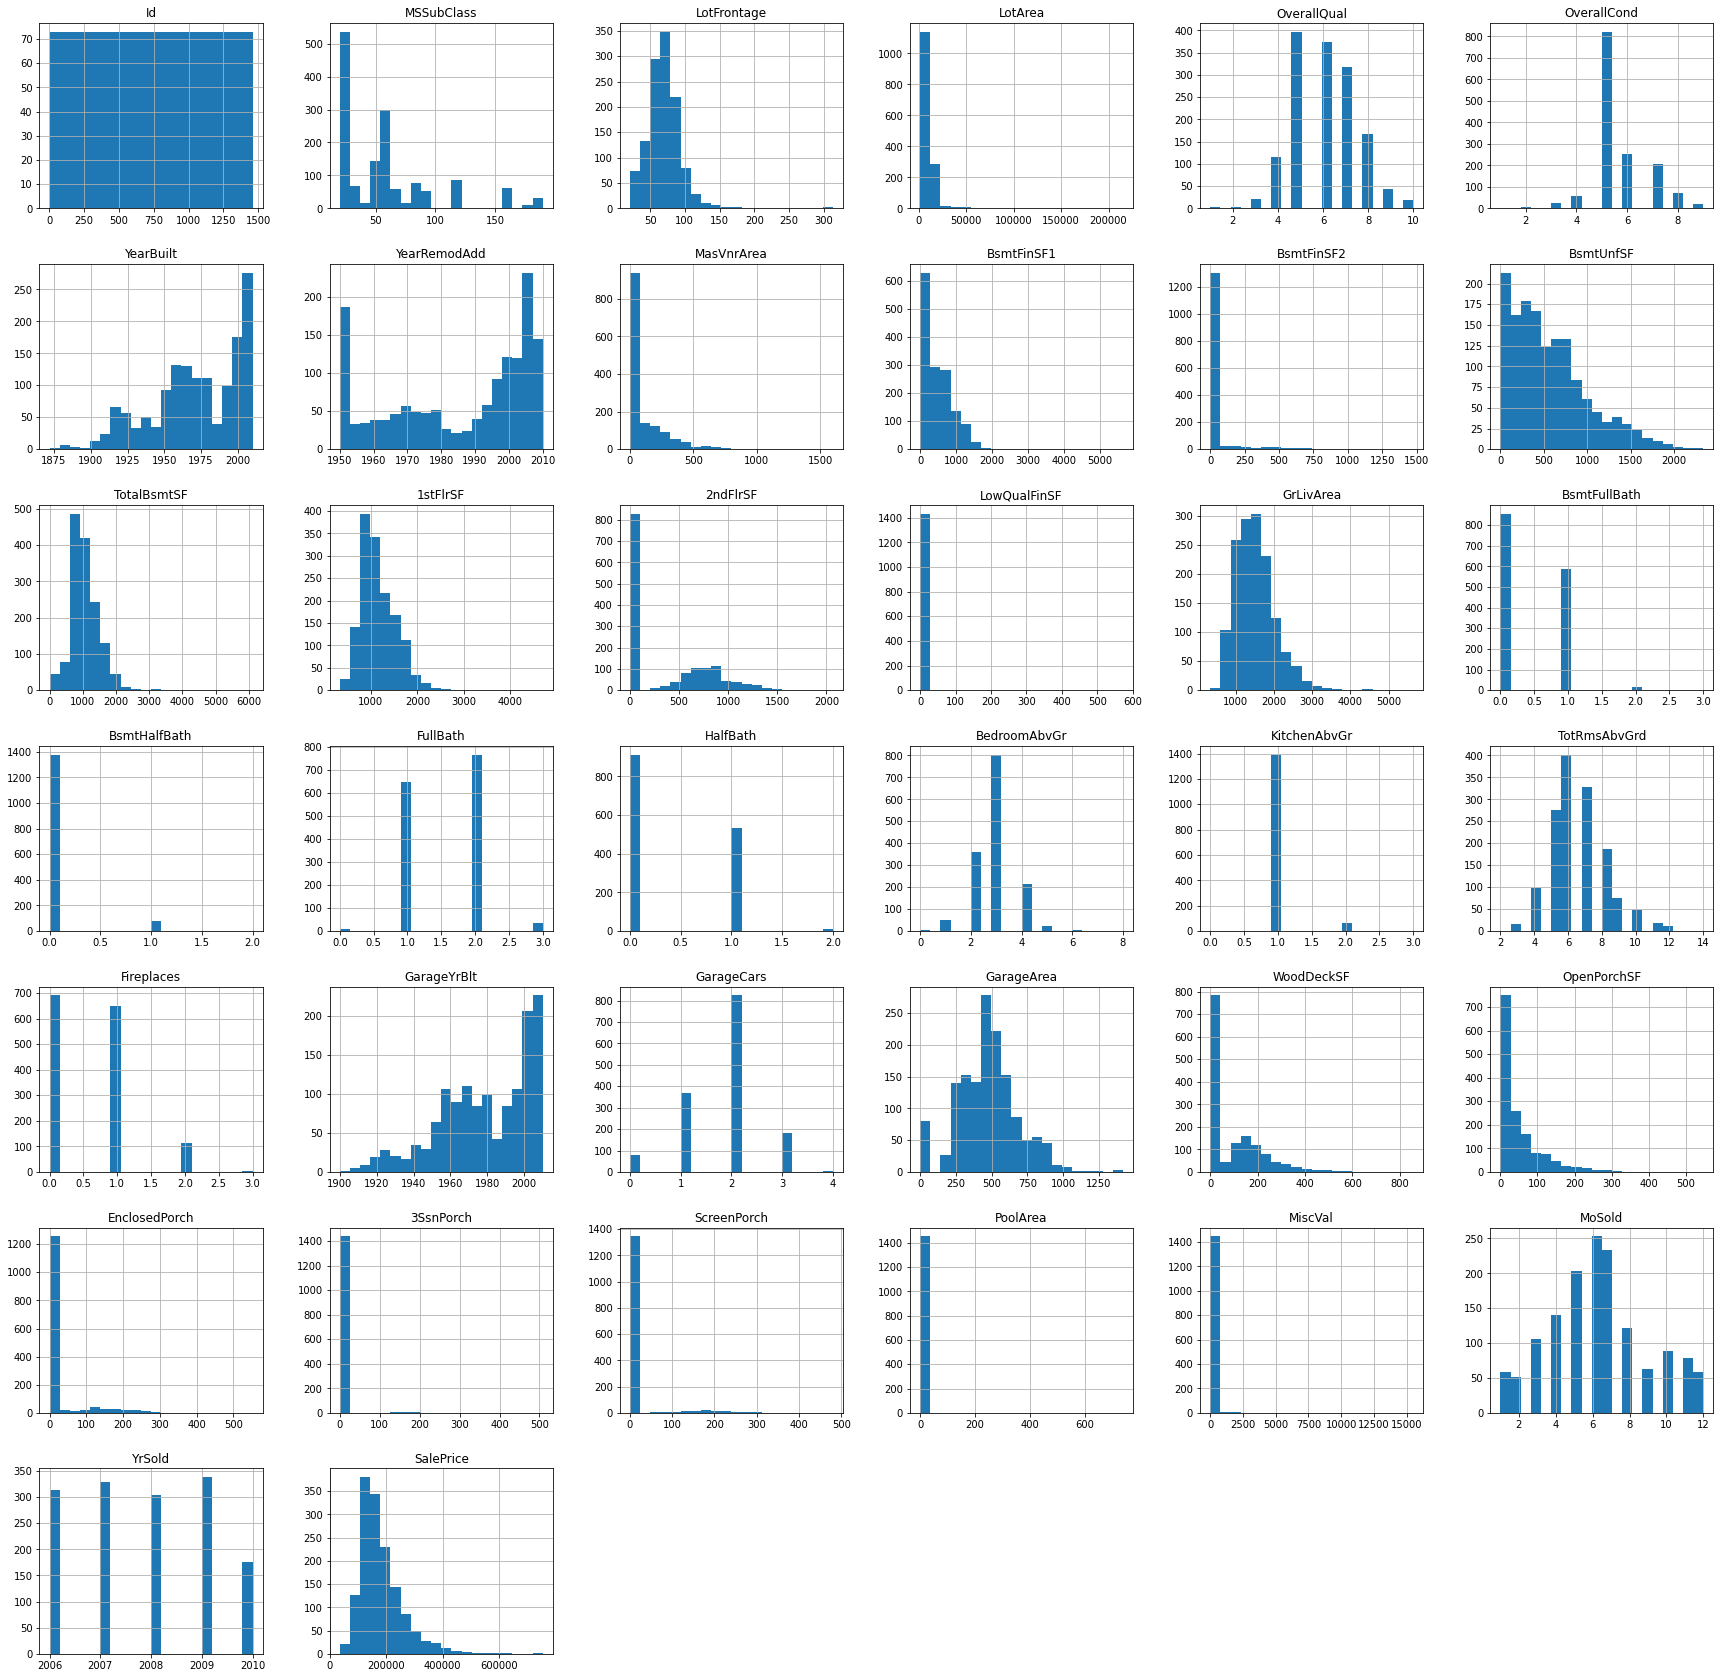

In [7]:
train_df.hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

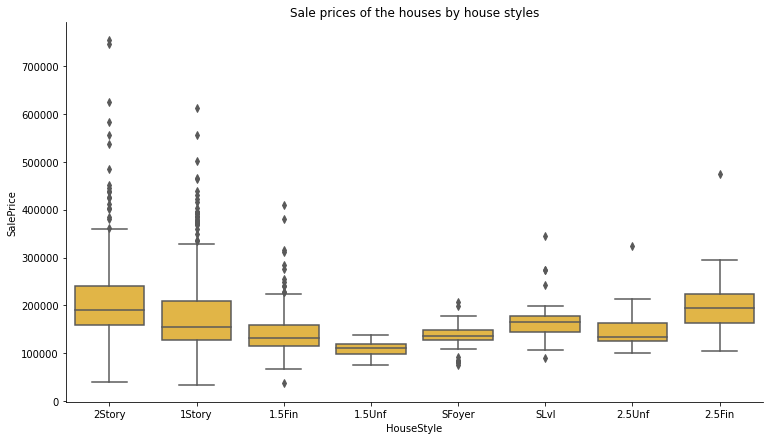

In [8]:
sns.catplot(x = "HouseStyle",
            y = "SalePrice",
            kind = "box",
            height = 6,
            aspect = 1.8,
            color = "#FBC02D",
            data = train_df).set(title = "Sale prices of the houses by house styles");

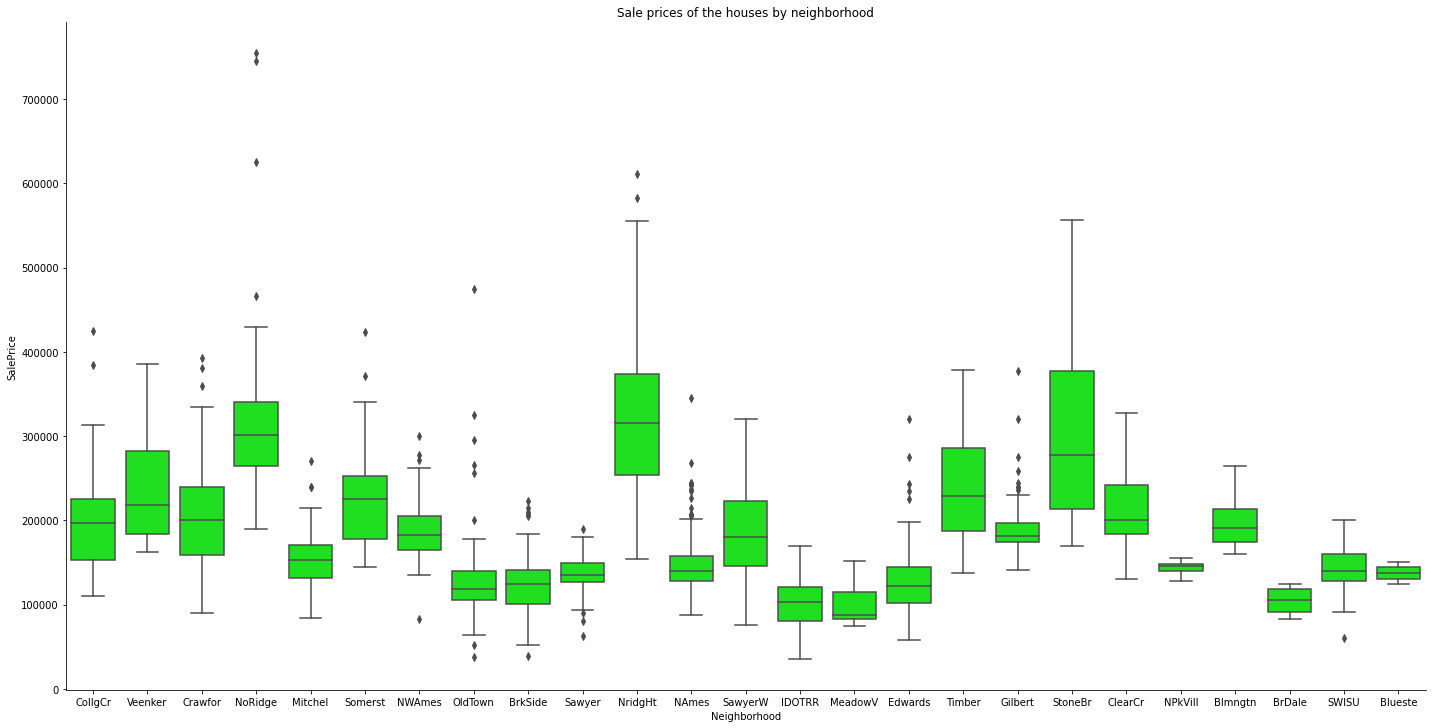

In [9]:
sns.catplot(x = "Neighborhood",
            y = "SalePrice",
            kind = "box",
            height = 10,
            aspect = 2,
            color = "#00FF00",
            data = train_df).set(title = "Sale prices of the houses by neighborhood");

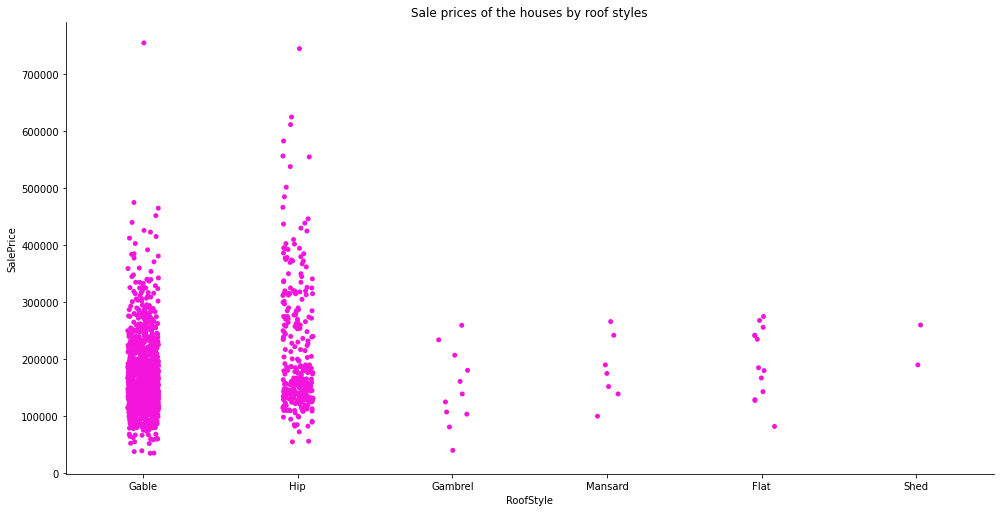

In [10]:
sns.catplot(x = "RoofStyle",
            y = "SalePrice",
            kind = "strip",
            height = 7,
            aspect = 2,
            color = "#F415DC",
            data = train_df).set(title = "Sale prices of the houses by roof styles");

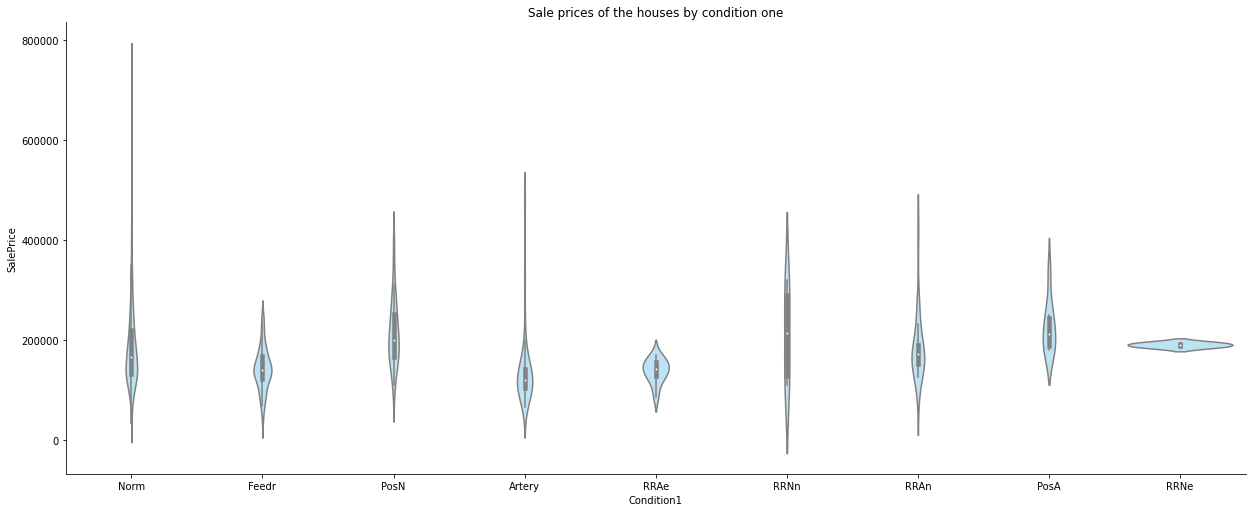

In [11]:
sns.catplot(x = "Condition1",
            y = "SalePrice",
            kind = "violin",
            height = 7,
            aspect = 2.5,
            color = "#B3E5FC",
            data = train_df).set(title = "Sale prices of the houses by condition one");

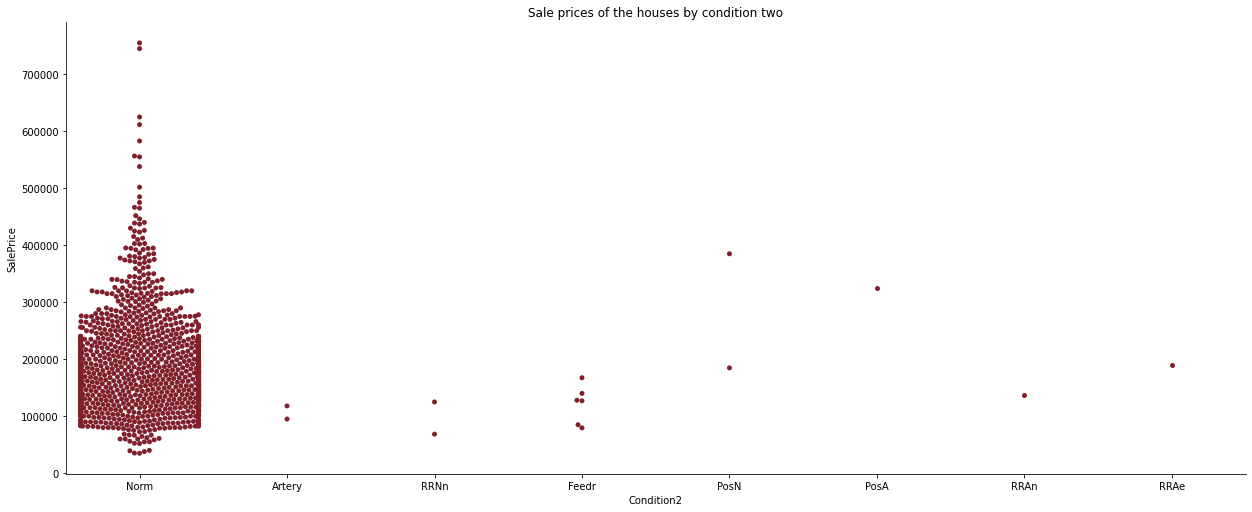

In [12]:
sns.catplot(x = "Condition2",
            y = "SalePrice",
            kind = "swarm",
            height = 7,
            aspect = 2.5,
            color = "#80202B",
            data = train_df).set(title = "Sale prices of the houses by condition two");

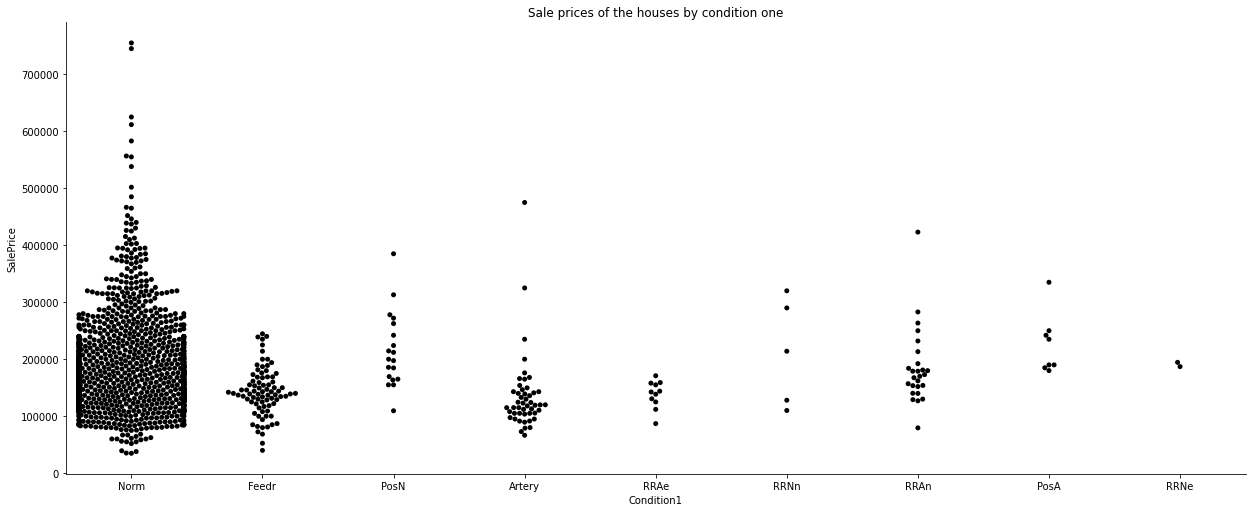

In [13]:
sns.catplot(x = "Condition1",
            y = "SalePrice",
            kind = "swarm",
            height = 7,
            aspect = 2.5,
            color = "#000000",
            data = train_df).set(title = "Sale prices of the houses by condition one");

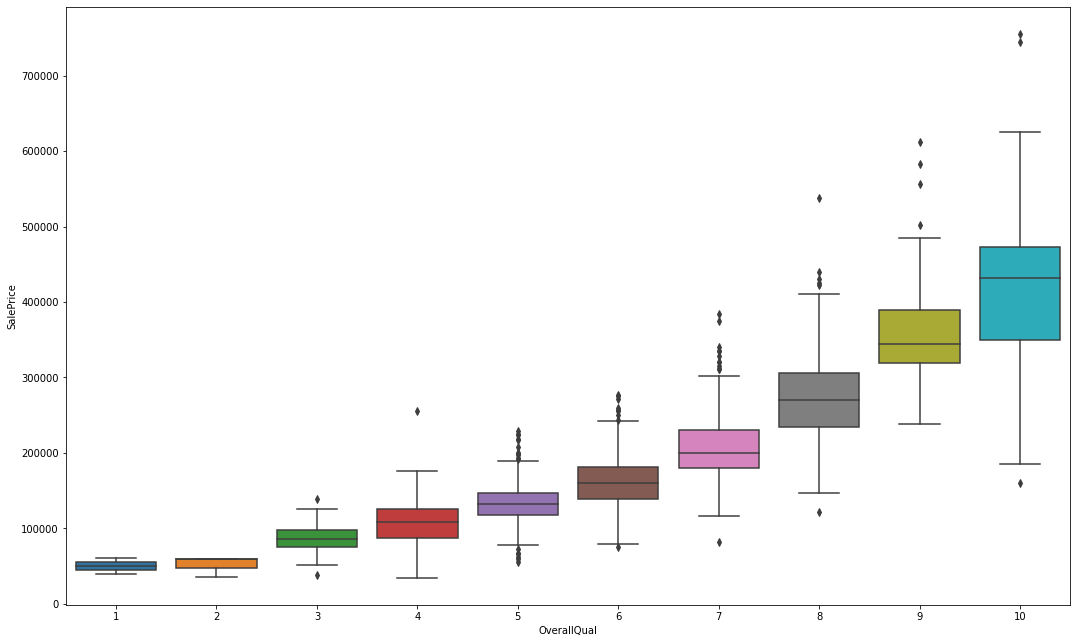

In [14]:
sp = train_df["SalePrice"]
oq = train_df["OverallQual"]
df = pd.concat([sp, oq], axis=1)      
f, ax = plt.subplots(figsize = (18, 11))
fig = sns.boxplot(df["OverallQual"], df["SalePrice"]);

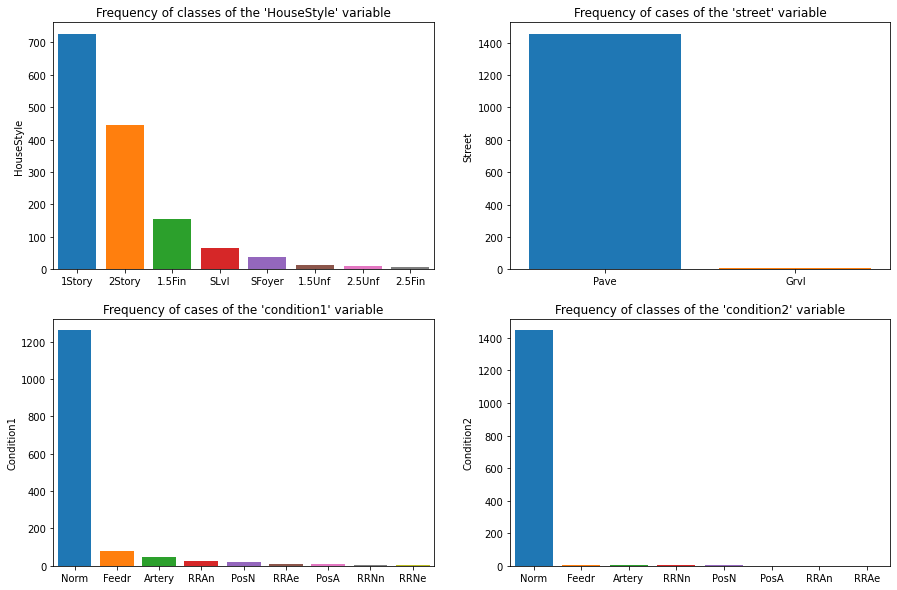

In [15]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
axes = axes.flatten()

sns.barplot(ax = axes[0],
            x = train_df["HouseStyle"].value_counts().index,
            y = train_df["HouseStyle"].value_counts(),
            saturation = 1).set(title = "Frequency of classes of the 'HouseStyle' variable");

sns.barplot(ax = axes[1],
            x = train_df["Street"].value_counts().index,
            y = train_df["Street"].value_counts(),
            saturation = 1).set(title = "Frequency of cases of the 'street' variable");

sns.barplot(ax = axes[2],
            x = train_df["Condition1"].value_counts().index,
            y = train_df["Condition1"].value_counts(),
            saturation = 1).set(title = "Frequency of cases of the 'condition1' variable");

sns.barplot(ax = axes[3],
            x = train_df["Condition2"].value_counts().index,
            y = train_df["Condition2"].value_counts(),
            saturation = 1).set(title = "Frequency of classes of the 'condition2' variable");

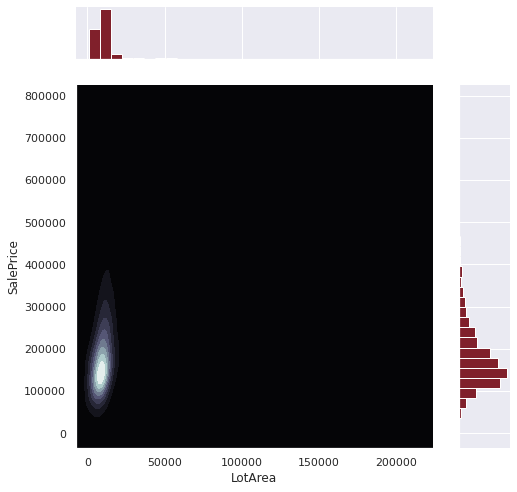

In [16]:
sns.set_theme(style = "darkgrid")

g = sns.JointGrid(data = train_df, size = 7, height = 5, x = "LotArea", y = "SalePrice", space = 0.5)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "bone")
g.plot_marginals(sns.histplot, color = "#80202B", alpha = 1, bins = 30);

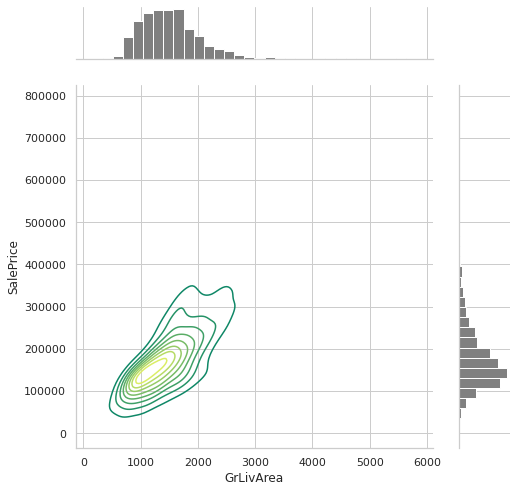

In [17]:
sns.set_theme(style = "whitegrid")

g = sns.JointGrid(data = train_df, size = 7, height = 5, x = "GrLivArea", y = "SalePrice", space = 0.5)
g.plot_joint(sns.kdeplot, fill = False, thresh = 0, cmap = "summer")
g.plot_marginals(sns.histplot, color = "#808080", alpha = 1, bins = 30);

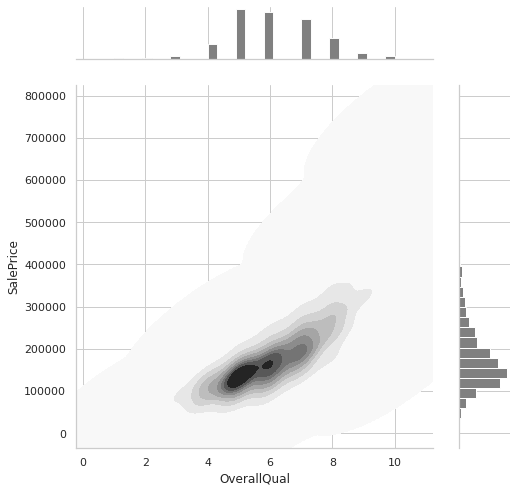

In [18]:
g = sns.JointGrid(data = train_df, size = 7, height = 5, x = "OverallQual", y = "SalePrice", space = 0.5)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "binary")
g.plot_marginals(sns.histplot, color = "#808080", alpha = 1, bins = 30);

In [19]:
fig = px.histogram(train_df, x = "OverallQual",
                   y = "SalePrice",
                   marginal = None,
                   color = "HouseStyle",
                   text_auto = True,
                   hover_data  = train_df.columns,
                   height = 500, width = 800)
fig.show()

In [20]:
fig = px.histogram(train_df, x = "BedroomAbvGr",
                   y = "SalePrice",
                   marginal = None,
                   color = "HouseStyle", text_auto = True,
                   hover_data  = train_df.columns,
                   height = 500, width = 800)
fig.show()

In [21]:
fig = px.histogram(train_df, x = "RoofMatl",
                   y = "SalePrice",
                   marginal = None,
                   color = "Heating",
                   text_auto = True,
                   hover_data  = train_df.columns,
                   height = 500, width = 800)
fig.show()

In [22]:
fig = px.ecdf(train_df, x = "SalePrice", log_x = True, log_y = True,
              color = "Street", height = 500, width = 800)
fig.show()

In [23]:
fig = px.ecdf(train_df, x = "SalePrice", log_x = True, log_y = True,
              color = "GarageCars", height = 500, width = 800)
fig.show()

In [24]:
fig = px.ecdf(train_df, x = "SalePrice", log_x = True, log_y = True,
              color = "Heating", height = 500, width = 800)
fig.show()

In [25]:
fig = px.bar(train_df, x = "HouseStyle", y = "SalePrice", color = "SaleType",
             pattern_shape = "Street", pattern_shape_sequence=["x", "+"],
             text_auto = True, height = 500, width = 830)
fig.show()


In [26]:
fig = px.density_heatmap(train_df, x = "LotArea", y = "SalePrice", marginal_x = "rug",
                         marginal_y = "histogram", height = 500, width = 830, text_auto = True,
                         title = "Density heatmap between LotArea and SalePrice variables")
fig.show()

In [27]:
fig = px.density_heatmap(train_df, x = "YearBuilt", y = "SalePrice", marginal_x = "rug",
                         marginal_y = "histogram", height = 500, width = 830, text_auto = True,
                         title = "Density heatmap between YearBuilt and SalePrice variables")
fig.show()

In [28]:
fig = px.density_heatmap(train_df, x = "GrLivArea", y = "SalePrice", marginal_x = "rug",
                         marginal_y = "histogram", height = 500, width = 830, text_auto = True,
                         title = "Density heatmap between GrLivArea and SalePrice variables")
fig.show()

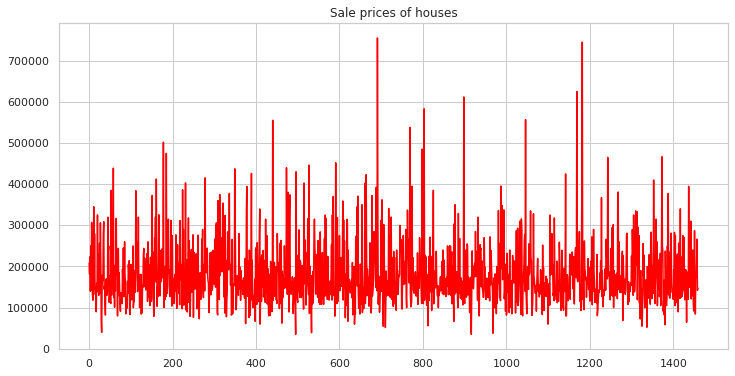

In [29]:
fig, ax = plt.subplots(figsize = (12, 6))
sale_price = list()
for sp in train_df["SalePrice"].values:
    sale_price.append(sp)
sale_price = pd.Series(sale_price)
sale_price.plot(kind = "line", colormap = "autumn").set_title("Sale prices of houses");

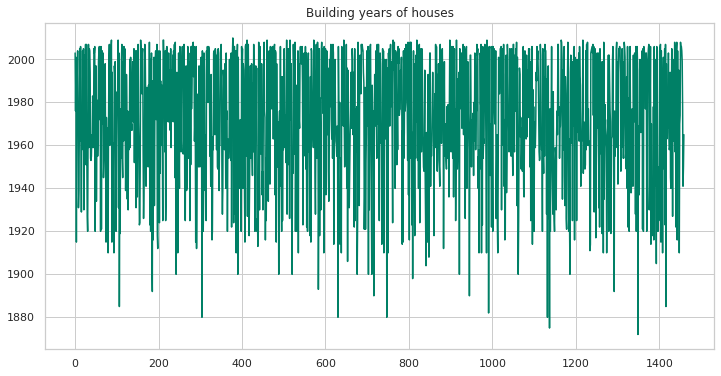

In [30]:
fig, ax = plt.subplots(figsize = (12, 6))
year_built = list()
for year in train_df["YearBuilt"].values:
    year_built.append(year)
year_built = pd.Series(year_built)
year_built.plot(kind = "line", colormap = "summer").set_title("Building years of houses");

In [31]:
print("Basic descriptive statistics of the target variable - 'SalePrice': \n\n",
      train_df["SalePrice"].describe())

Basic descriptive statistics of the target variable - 'SalePrice': 

 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<div style="border-radius:10px;
            border : black solid;
            background-color: 	#6EF322;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Target variable</center></h4>
    
● average of the target variable is 180921
    
● standard deviation of the target variable is 79442
    
● minimum of the target variable is 34900
    
● maximum of the target variable is 755000
    
● median of the target variable is 163000

In [32]:
train_df["YearBuilt"].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

<div style="border-radius:10px;
            border : black solid;
            background-color: 	#6EF322;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Years built</center></h4>
    
● The oldest house has been built in 1872
    
● The newest house has been built in 2010



<div style="border-radius:10px;
            border : black solid;
            background-color:#EEFD00;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Skewness and kurtosis</center></h4>
    
#### ACKNOWLEDGEMENT:
This article was obtained from: https://www.turing.com/kb/calculating-skewness-and-kurtosis-in-python
    
    
    
A continuous distribution of random values is called a normal distribution. A random value is one that depends on the outcome of a random event. For example, you either get heads or tails when you flip a coin. But you cannot determine with certainty what you will get. When you’re plotting against something that has only a probable chance of happening, you will get a probability distribution. The probability of random values that can take on a value is known as a continuous probability distribution. The number of values that the probability has are infinite and will form a continuous curve. So, instead of writing the probability variables, you can define the range in which they lie.

### Skewness    
Skewness is a statistical measure of asymmetric distribution of data while kurtosis helps determine if the distribution is heavy-tailed compared to a normal distribution. Skewness is a way of estimating and measuring the shape of a distribution. It is a vital statistical method for estimating asymmetrical behavior rather than computing the frequency distribution. Its value can be either positive or negative.

A positive skew will indicate that the tail is on the right side. It will extend toward the most positive values. On the other hand, a negative skew will indicate a tail on the left side and will extend to the more negative side. A zero value will indicate that there is no skewness in the distribution, which means that the distribution is perfectly symmetrical.

The distribution of skewness values is as below:

● Skewness = 0 when the distribution is normal
    
● Skewness > 0 or positive when more weight is on the left side of the distribution
    
● Skewness < 0 or negative when more weight is on the right side of the distribution
            
            
### Kurtosis       
Kurtosis is a statistical term that characterizes frequency distribution.
Aside from determining if a distribution is heavy-tailed, it also provides insight into the shape of the frequency distribution.
            
   
● Kurtosis of a normal distribution is equal to 3
              
● When the kurtosis is less than 3, it is known as platykurtic
              
● When the kurtosis is greater than 3, it is leptokurtic

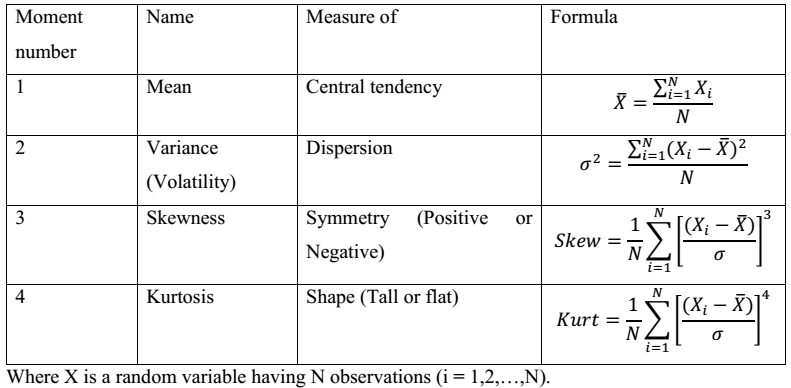

In [33]:
print("Skewness: ", train_df["SalePrice"].skew())

Skewness:  1.8828757597682129


<div style="border-radius:10px;
            border : black solid;
            background-color: 	#6EF322;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Positive skewness</center></h4>
    
Positive skewness, because more weight is on the left side of the distribution

In [34]:
print("Kurtosis: ", train_df["SalePrice"].kurt())

Kurtosis:  6.536281860064529


<div style="border-radius:10px;
            border : black solid;
            background-color: 	#6EF322;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Kurtosis grater than 3</center></h4>
    
It is leptokurtic. It will signify that it produces outliers rather than a normal distribution.

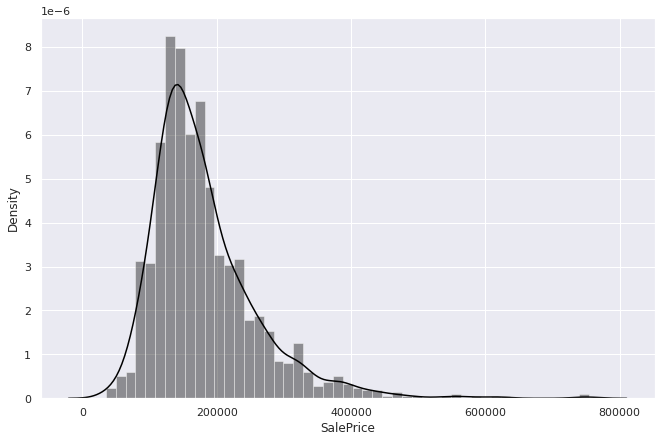

In [35]:
sns.set(rc = {"figure.figsize" : (11, 7)})
sns.distplot(train_df["SalePrice"], color = "black");

<div style="border-radius:10px;
            border : black solid;
            background-color:#6EF322;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> The graph shows positive skewness</center></h4>
    
We see positive skewness from the graph above. As the graphs shows, more weight is on the left side of the distribution. We will fix it using 'norm' function and "log1p" function of numpy

In [36]:
# we are fixing the variable distribution
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])
train_df["SalePrice"].head(n = 10)

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
5    11.870607
6    12.634606
7    12.206078
8    11.774528
9    11.678448
Name: SalePrice, dtype: float64

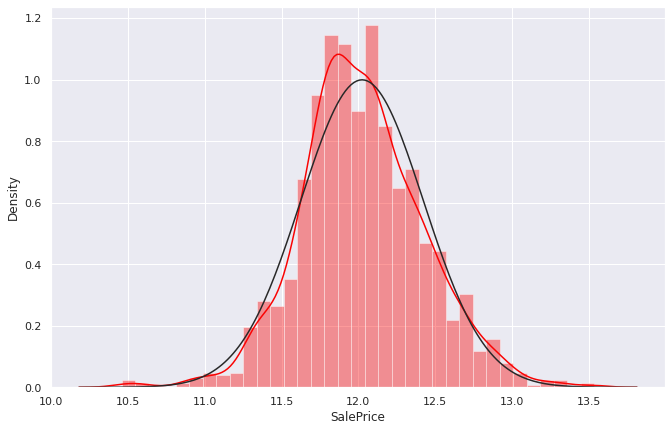

In [37]:
# distribution of the fixed variable

sns.distplot(train_df["SalePrice"], fit = norm, color = "#FA0303");

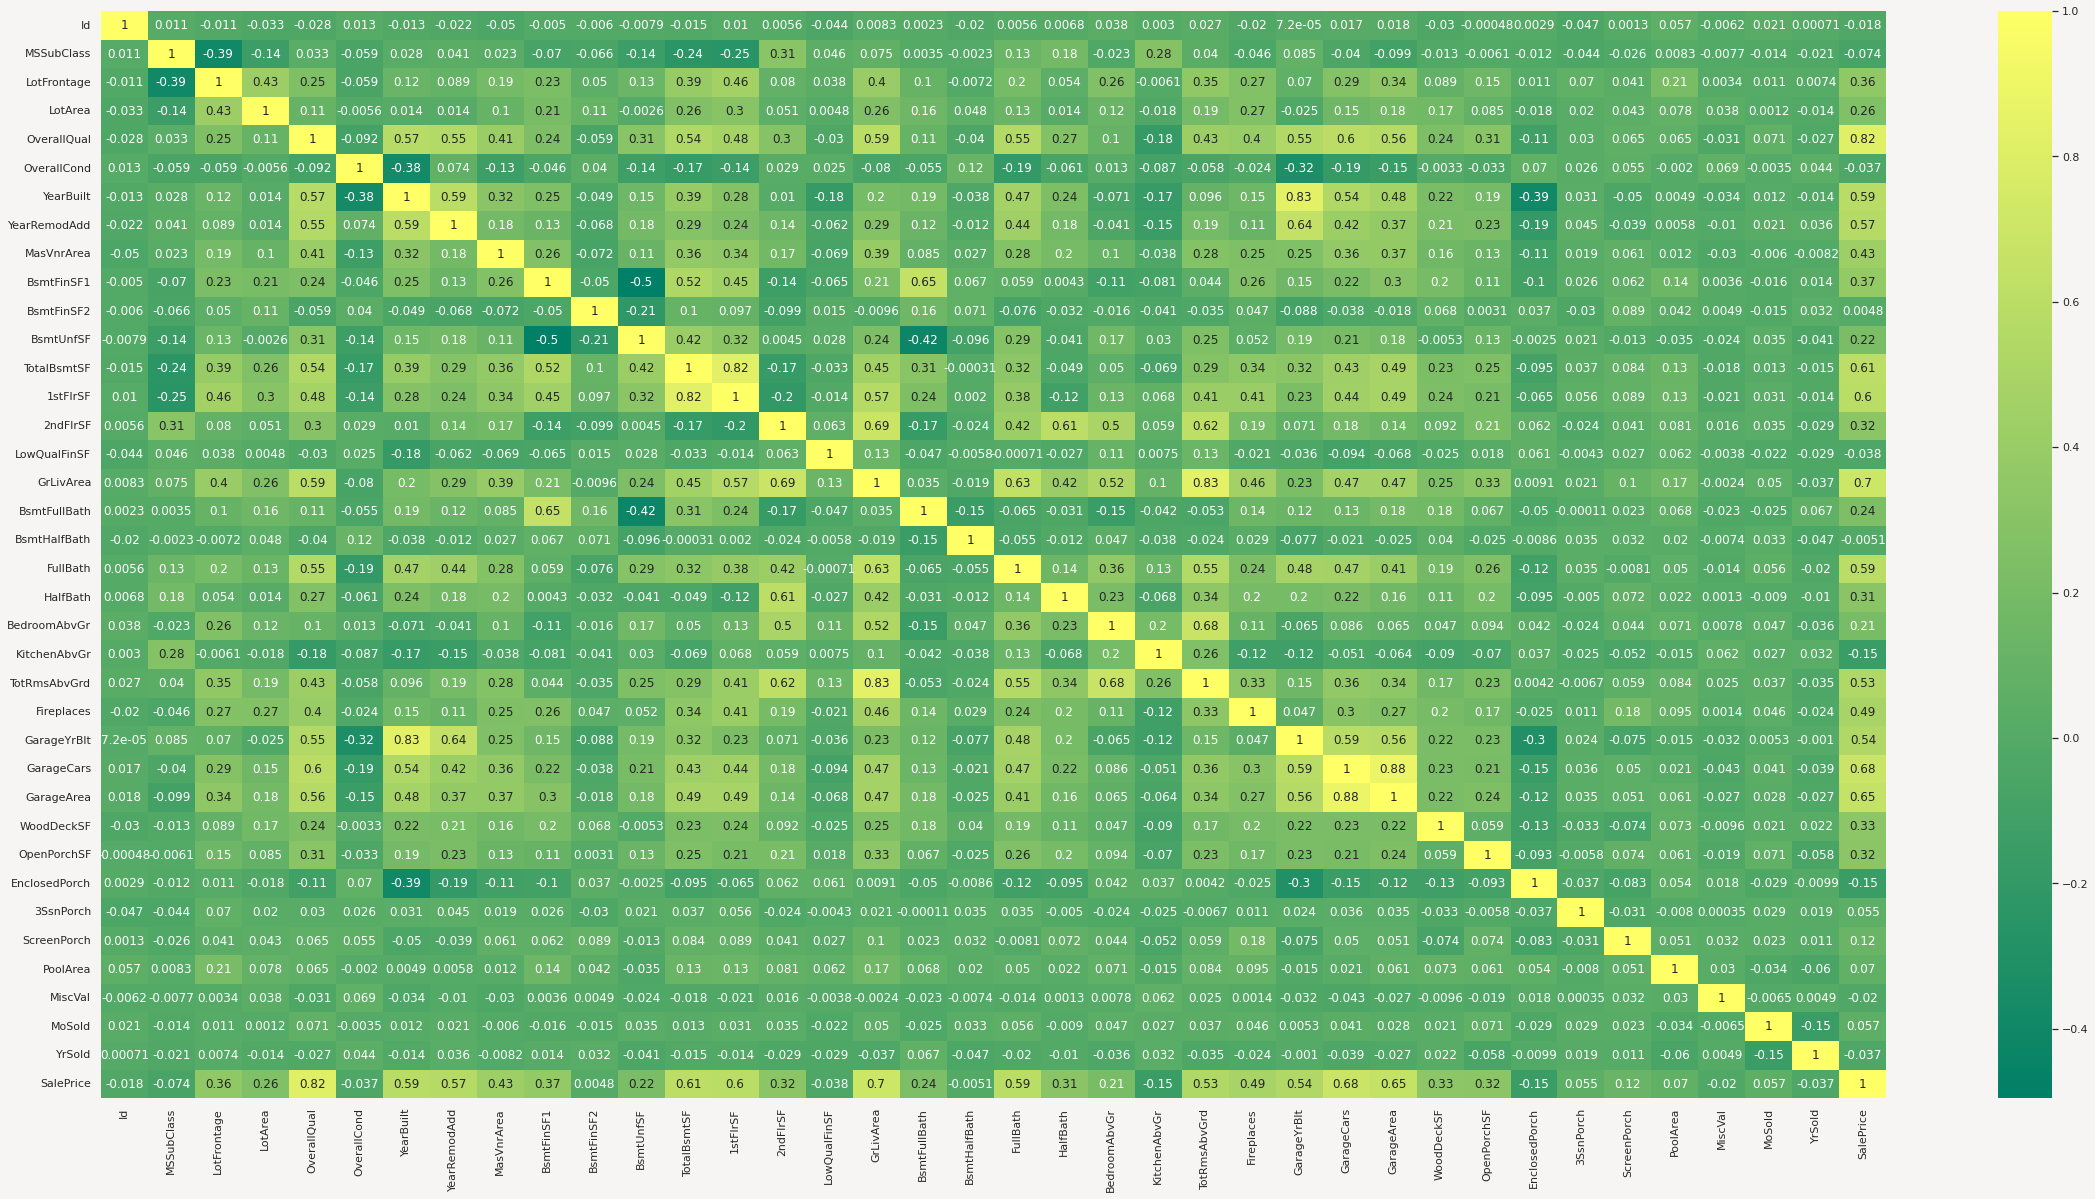

In [38]:
plt.figure(figsize = [40, 20], facecolor = "#F7F4F4")
sns.heatmap(train_df.corr(), annot = True, cmap = "summer");

<div style="border-radius:10px;
            border : black solid;
            background-color: 	#6EF322;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Conclusion</center></h4>
    
From the heatmap above, we see positive and negative correlations between the variables. And this is what we do not want. 

<div style="border-radius:10px;
            border : black solid;
            background-color:#EEFD00;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Correlation greater then 0.5 with 'SalePrice' variable</center></h4>
    
Here we will select variables that have correlation coefficient greater than 0.4 with 'SalePrice' variable.

In [39]:
correlation_df = train_df.corr()
high_correlation_variables = correlation_df.index[abs(correlation_df["SalePrice"]) > 0.4]
high_correlation_variables

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

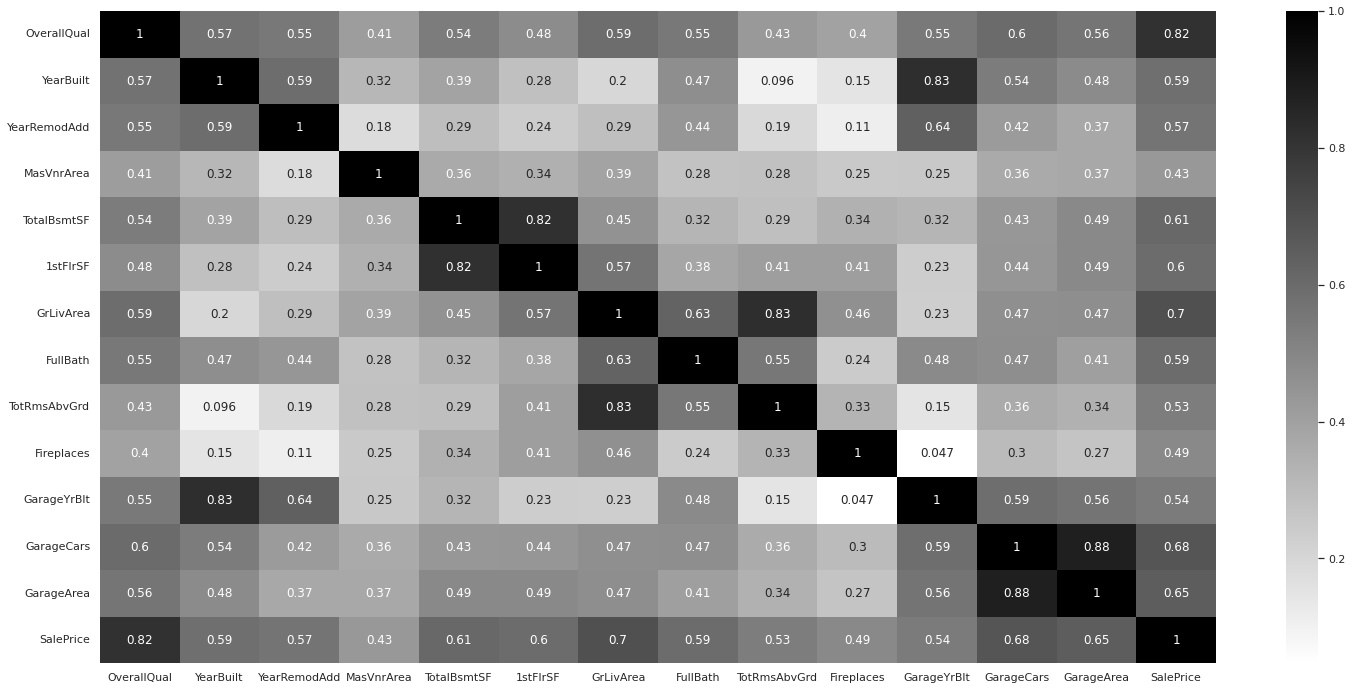

In [40]:
plt.figure(figsize = (25, 12))
sns.heatmap(train_df[high_correlation_variables].corr(), annot = True, cmap = "binary");

In [41]:
fig = px.imshow(train_df[high_correlation_variables])
fig.show()

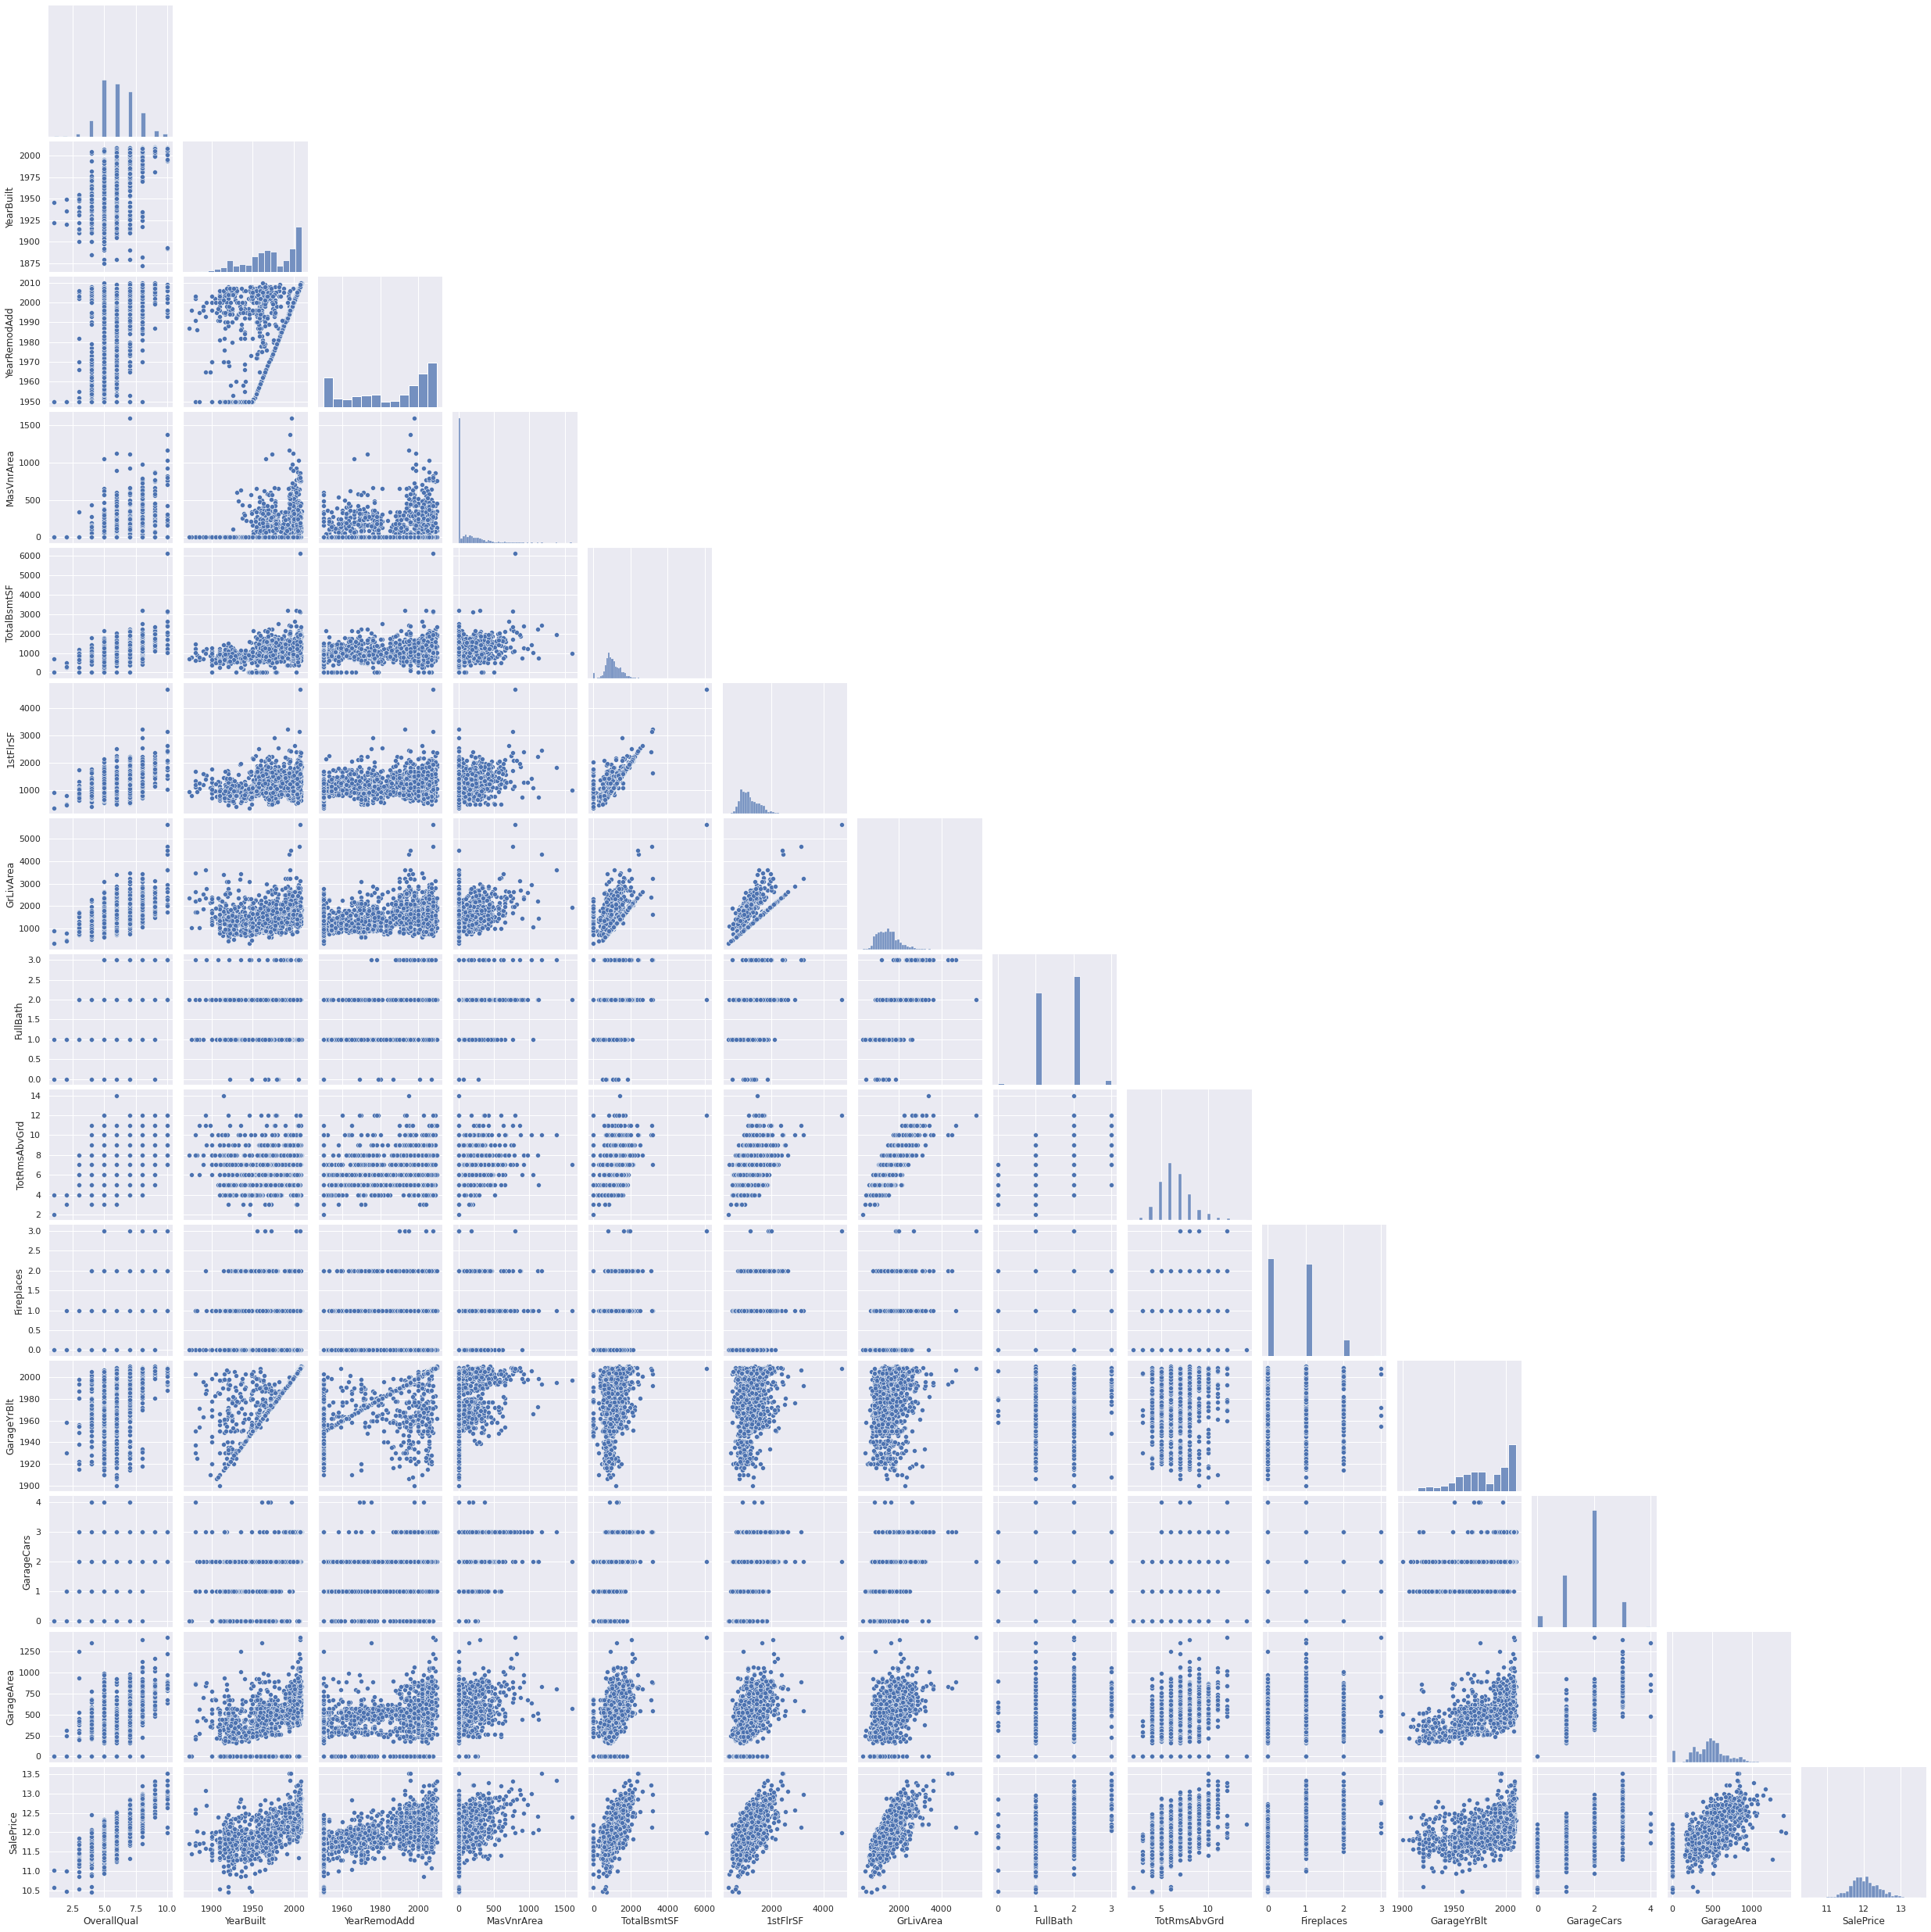

In [42]:
sns.pairplot(train_df[high_correlation_variables], corner = True);

<div style="border-radius:10px;
            border : black solid;
            background-color: #6EF322;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Feature selection </center></h4>
    
An interesting and important point is here. So, looking at the heat map, we will choose some of the variables that are correlated with each other and with the 'SalesPrice' variable. In this selection process, we have to keep one of the columns correlated with the other.
    
We will select "SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt" variables. Because correlation coefficient of these variables with 'SalePrice' variable is high, BUT correlation coefficient between each other is very low

In [43]:
train_df[high_correlation_variables].corr()

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  \
OverallQual      1.000000   0.572323      0.550684    0.411876     0.537808   
YearBuilt        0.572323   1.000000      0.592855    0.315707     0.391452   
YearRemodAdd     0.550684   0.592855      1.000000    0.179618     0.291066   
MasVnrArea       0.411876   0.315707      0.179618    1.000000     0.363936   
TotalBsmtSF      0.537808   0.391452      0.291066    0.363936     1.000000   
1stFlrSF         0.476224   0.281986      0.240379    0.344501     0.819530   
GrLivArea        0.593007   0.199010      0.287389    0.390857     0.454868   
FullBath         0.550600   0.468271      0.439046    0.276833     0.323722   
TotRmsAbvGrd     0.427452   0.095589      0.191740    0.280682     0.285573   
Fireplaces       0.396765   0.147716      0.112581    0.249070     0.339519   
GarageYrBlt      0.547766   0.825667      0.642277    0.252691     0.322445   
GarageCars       0.600671   0.537850      0.420622    0.364204     0.434585   
GarageArea       0.562022   0.478954      0.371600    0.373066     0.486665   
SalePrice        0.817185   0.586570      0.565608    0.430809     0.612134   

              1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  \
OverallQual   0.476224   0.593007  0.550600      0.427452    0.396765   
YearBuilt     0.281986   0.199010  0.468271      0.095589    0.147716   
YearRemodAdd  0.240379   0.287389  0.439046      0.191740    0.112581   
MasVnrArea    0.344501   0.390857  0.276833      0.280682    0.249070   
TotalBsmtSF   0.819530   0.454868  0.323722      0.285573    0.339519   
1stFlrSF      1.000000   0.566024  0.380637      0.409516    0.410531   
GrLivArea     0.566024   1.000000  0.630012      0.825489    0.461679   
FullBath      0.380637   0.630012  1.000000      0.554784    0.243671   
TotRmsAbvGrd  0.409516   0.825489  0.554784      1.000000    0.326114   
Fireplaces    0.410531   0.461679  0.243671      0.326114    1.000000   
GarageYrBlt   0.233449   0.231197  0.484557      0.148112    0.046822   
GarageCars    0.439317   0.467247  0.469672      0.362289    0.300789   
GarageArea    0.489782   0.468997  0.405656      0.337822    0.269141   
SalePrice     0.596981   0.700927  0.594771      0.534422    0.489450   

              GarageYrBlt  GarageCars  GarageArea  SalePrice  
OverallQual      0.547766    0.600671    0.562022   0.817185  
YearBuilt        0.825667    0.537850    0.478954   0.586570  
YearRemodAdd     0.642277    0.420622    0.371600   0.565608  
MasVnrArea       0.252691    0.364204    0.373066   0.430809  
TotalBsmtSF      0.322445    0.434585    0.486665   0.612134  
1stFlrSF         0.233449    0.439317    0.489782   0.596981  
GrLivArea        0.231197    0.467247    0.468997   0.700927  
FullBath         0.484557    0.469672    0.405656   0.594771  
TotRmsAbvGrd     0.148112    0.362289    0.337822   0.534422  
Fireplaces       0.046822    0.300789    0.269141   0.489450  
GarageYrBlt      1.000000    0.588920    0.564567   0.541073  
GarageCars       0.588920    1.000000    0.882475   0.680625  
GarageArea       0.564567    0.882475    1.000000   0.650888  
SalePrice        0.541073    0.680625    0.650888   1.000000

<div style="border-radius:10px;
            border : black solid;
            background-color: #6EF322;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> High correlation between some variables </center></h4>
    
An important point is here. So, looking at the correlation table we will see that there is high correlation between some of the variables. These are:

1. "GarageArea" and "GarageCars"
2. "1stFlrSF" and "TotalBsmtSF"
3. "TotRmsAbvGrd" and "GrLivArea"
4. "GarageYearbuilt" and "YearBuilt"
     
    
We will drop "GarageArea", "1stFlrSF", "TotRmsAbvGrd", "GarageYrBlt" variables later

In [44]:
# variables that have highest correlation with target variable 

variables = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
for var in variables:
    print("Correlation coefficient:", train_df["SalePrice"].corr(train_df[var]))

Correlation coefficient: 0.8171846144867666
Correlation coefficient: 0.7009269871427152
Correlation coefficient: 0.68062487265819
Correlation coefficient: 0.6121342283262258
Correlation coefficient: 0.5947706649972515
Correlation coefficient: 0.586570192789716


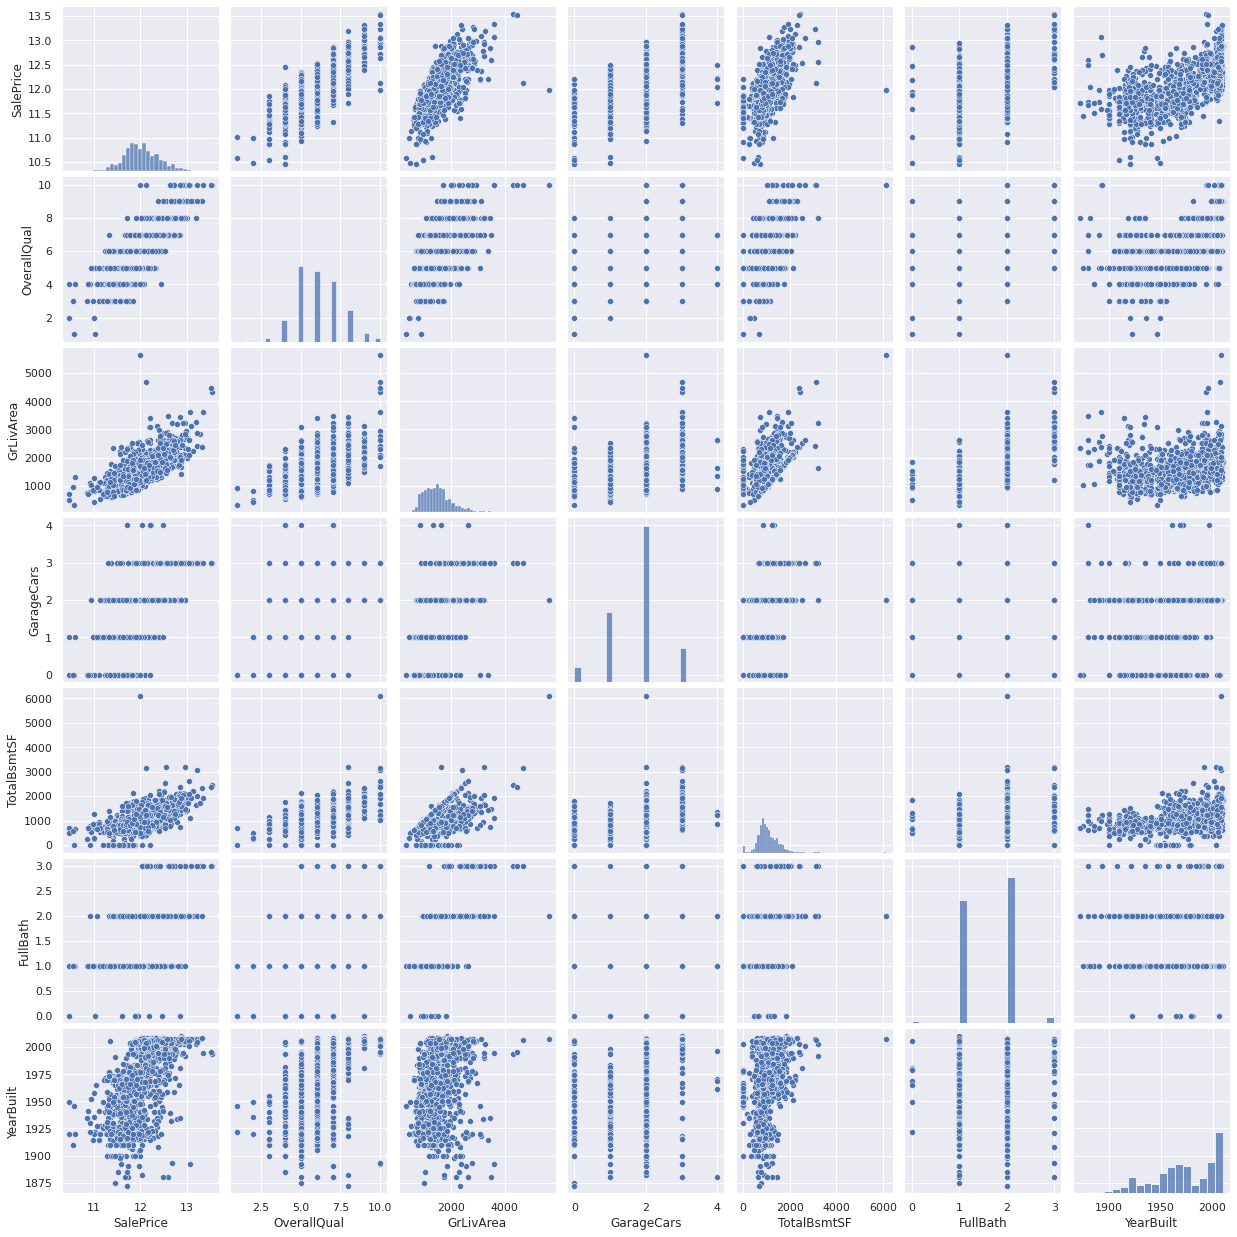

In [45]:
variables = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
sns.pairplot(train_df[variables]);

### Dropping outliers

In [46]:
def outlier_detection_train(df, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(df[(df[col] < Q1 - outlier_point)|(df[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n: will_drop_train.append(r)
    return will_drop_train

will_drop_train = outlier_detection_train(train_df, 5, train_df.select_dtypes(["float", "int"]).columns)
train_df.drop(will_drop_train, inplace = True, axis = 0)

## Behaving with null values

In [47]:
# define target variable

y_train = train_df["SalePrice"]

In [48]:
# combine train and test data for convenience

train_and_test_df = pd.concat([train_df, test_df], axis = 0)
train_and_test_df = train_and_test_df.drop(["Id", "SalePrice"], axis = 1)

In [49]:
# create dataframes consist of total number and percent of missing data

number_of_missing_df = train_and_test_df.isnull().sum().sort_values(ascending = False)
percent_of_missing_df = ((train_and_test_df.isnull().sum() / train_and_test_df.isnull().count())*100).sort_values(ascending = False)

In [50]:
# combine the dataframes and print

missing_df = pd.concat([number_of_missing_df,
                        percent_of_missing_df],
                        keys = ["total number of missing data", 'total percent of missing data'],
                        axis = 1)


print(missing_df.head(20))

              total number of missing data  total percent of missing data
PoolQC                                2880                      99.792100
MiscFeature                           2786                      96.534997
Alley                                 2690                      93.208593
Fence                                 2322                      80.457380
FireplaceQu                           1415                      49.029799
LotFrontage                            476                      16.493416
GarageYrBlt                            155                       5.370755
GarageFinish                           155                       5.370755
GarageQual                             155                       5.370755
GarageCond                             155                       5.370755
GarageType                             153                       5.301455
BsmtExposure                            81                       2.806653
BsmtCond                              

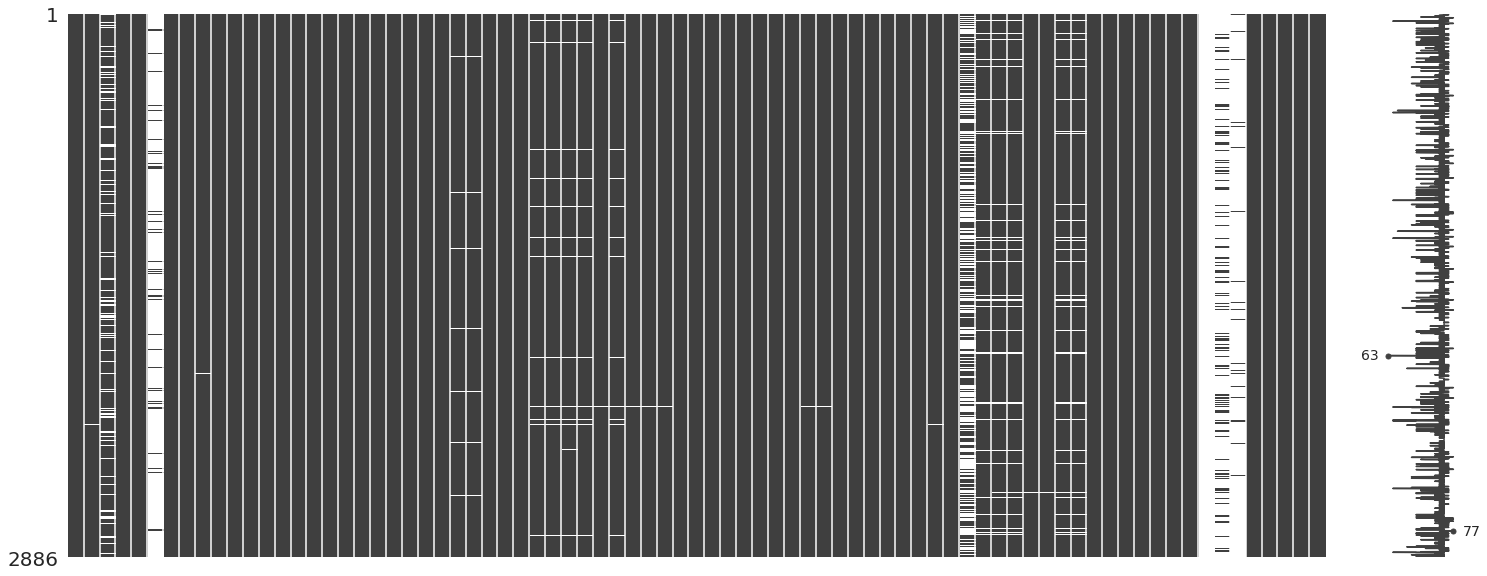

In [51]:
#visualize missing values with matrix
msno.matrix(train_and_test_df);

<div style="border-radius:10px;
            border : black solid;
            background-color:#EEFD00;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Drop unnecessary variables</center></h4>
    
Here we will drop some variables. Because there are many null values of some of these variables. To keep and use these variables in our model will slow performance of the model and do not give any improvement. So lets do this.

In [52]:
train_and_test_df = train_and_test_df.drop((missing_df[missing_df["total number of missing data"] > 100]).index, axis = 1)
train_and_test_df.isnull().sum().sort_values(ascending = False)

BsmtExposure     81
BsmtCond         81
BsmtQual         80
BsmtFinType2     79
BsmtFinType1     78
                 ..
Foundation        0
Heating           0
HeatingQC         0
CentralAir        0
SaleCondition     0
Length: 68, dtype: int64

<div style="border-radius:10px;
            border : black solid;
            background-color:#EEFD00;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Filling null values</center></h4>
    
We will fill null values of numeric variables with the median of that variable.
We will fill null values of categoric variables with the most frequent value of that variable.

In [53]:
numeric_data = [column for column in train_and_test_df.select_dtypes(["int", "float"])]
categoric_data = [column for column in train_and_test_df.select_dtypes(exclude = ["int", "float"])]

for col in numeric_data:
    train_and_test_df[col].fillna(train_and_test_df[col].median(), inplace = True)
        
for col in categoric_data:
    train_and_test_df[col].fillna(train_and_test_df[col].value_counts().index[0], inplace = True)

In [54]:
#ckeck whether there are missing values

train_and_test_df.isnull().sum().sum()

0

<div style="border-radius:10px;
            border : black solid;
            background-color: #6EF322;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Not null</center></h4>
    
As it can be seen there is not any null values in the dataset. We filled them.

<div style="border-radius:10px;
            border : black solid;
            background-color:#EEFD00;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Other skewed distributions</center></h4>
    
In this section our goal is to fix other skewed numeric variables.

In [55]:
# we select numeric variables of the dataset
numeric_data = [column for column in train_and_test_df.select_dtypes(["int", "float"])]

# we check skew degree of that variables
vars_skewed = train_and_test_df[numeric_data].apply(lambda x: skew(x)).sort_values()

In [56]:
# we fix skew with 'log1p' function of numpy

for var in vars_skewed.index:
    train_and_test_df[var] = np.log1p(train_and_test_df[var])

In [57]:
train_and_test_df = train_and_test_df.drop(["GarageArea", "1stFlrSF", "TotRmsAbvGrd"],
                                          axis = 1)

In [58]:
train_and_test_df = pd.get_dummies(train_and_test_df, drop_first = True)
train_and_test_df.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    4.110874  9.042040     2.079442     1.791759   7.602900      7.602900   
1    3.044522  9.169623     1.945910     2.197225   7.589336      7.589336   
2    4.110874  9.328212     2.079442     1.791759   7.601902      7.602401   
3    4.262680  9.164401     2.079442     1.791759   7.557995      7.586296   
4    4.110874  9.565284     2.197225     1.791759   7.601402      7.601402   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  \
0    5.283204    6.561031         0.0   5.017280     6.753438  6.751101   
1    0.000000    6.886532         0.0   5.652489     7.141245  0.000000   
2    5.093750    6.188264         0.0   6.075346     6.825460  6.765039   
3    0.000000    5.379897         0.0   6.293419     6.629363  6.629363   
4    5.860786    6.486161         0.0   6.196444     7.044033  6.960348   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0   7.444833      0.693147      0.000000  1.098612  0.693147   
1           0.0   7.141245      0.000000      0.693147  1.098612  0.000000   
2           0.0   7.488294      0.693147      0.000000  1.098612  0.693147   
3           0.0   7.448916      0.693147      0.000000  0.693147  0.000000   
4           0.0   7.695758      0.693147      0.000000  1.098612  0.693147   

   BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  \
0      1.386294      0.693147    0.000000    1.098612    0.000000   
1      1.386294      0.693147    0.693147    1.098612    5.700444   
2      1.386294      0.693147    0.693147    1.098612    0.000000   
3      1.386294      0.693147    0.693147    1.386294    0.000000   
4      1.609438      0.693147    0.693147    1.386294    5.262690   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0     4.127134       0.000000        0.0          0.0       0.0      0.0   
1     0.000000       0.000000        0.0          0.0       0.0      0.0   
2     3.761200       0.000000        0.0          0.0       0.0      0.0   
3     3.583519       5.609472        0.0          0.0       0.0      0.0   
4     4.442651       0.000000        0.0          0.0       0.0      0.0   

     MoSold    YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0  1.098612  7.605392            0            0            1            0   
1  1.791759  7.604894            0            0            1            0   
2  2.302585  7.605392            0            0            1            0   
3  1.098612  7.604396            0            0            1            0   
4  2.564949  7.605392            0            0            1            0   

   Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0            1             0             0             1                0   
1            1             0             0             1                0   
2            1             0             0             0                0   
3            1             0             0             0                0   
4            1             0             0             0                0   

   LandContour_Low  ...  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  \
0                0  ...                 0                 0                 1   
1                0  ...                 0                 0                 1   
2                0  ...                 0                 0                 1   
3                0  ...                 0                 0                 1   
4                0  ...                 0                 0                 1   

   Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  \
0             1             0             0             0             0   
1             1             0             0             0             0   
2             1             0             0             0             0   
3             1             0

In [59]:
x_train = train_and_test_df[:len(train_df)]
x_test = train_and_test_df[len(train_df):]

In [60]:
x_train.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    4.110874  9.042040     2.079442     1.791759   7.602900      7.602900   
1    3.044522  9.169623     1.945910     2.197225   7.589336      7.589336   
2    4.110874  9.328212     2.079442     1.791759   7.601902      7.602401   
3    4.262680  9.164401     2.079442     1.791759   7.557995      7.586296   
4    4.110874  9.565284     2.197225     1.791759   7.601402      7.601402   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  \
0    5.283204    6.561031         0.0   5.017280     6.753438  6.751101   
1    0.000000    6.886532         0.0   5.652489     7.141245  0.000000   
2    5.093750    6.188264         0.0   6.075346     6.825460  6.765039   
3    0.000000    5.379897         0.0   6.293419     6.629363  6.629363   
4    5.860786    6.486161         0.0   6.196444     7.044033  6.960348   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0   7.444833      0.693147      0.000000  1.098612  0.693147   
1           0.0   7.141245      0.000000      0.693147  1.098612  0.000000   
2           0.0   7.488294      0.693147      0.000000  1.098612  0.693147   
3           0.0   7.448916      0.693147      0.000000  0.693147  0.000000   
4           0.0   7.695758      0.693147      0.000000  1.098612  0.693147   

   BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  \
0      1.386294      0.693147    0.000000    1.098612    0.000000   
1      1.386294      0.693147    0.693147    1.098612    5.700444   
2      1.386294      0.693147    0.693147    1.098612    0.000000   
3      1.386294      0.693147    0.693147    1.386294    0.000000   
4      1.609438      0.693147    0.693147    1.386294    5.262690   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0     4.127134       0.000000        0.0          0.0       0.0      0.0   
1     0.000000       0.000000        0.0          0.0       0.0      0.0   
2     3.761200       0.000000        0.0          0.0       0.0      0.0   
3     3.583519       5.609472        0.0          0.0       0.0      0.0   
4     4.442651       0.000000        0.0          0.0       0.0      0.0   

     MoSold    YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0  1.098612  7.605392            0            0            1            0   
1  1.791759  7.604894            0            0            1            0   
2  2.302585  7.605392            0            0            1            0   
3  1.098612  7.604396            0            0            1            0   
4  2.564949  7.605392            0            0            1            0   

   Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0            1             0             0             1                0   
1            1             0             0             1                0   
2            1             0             0             0                0   
3            1             0             0             0                0   
4            1             0             0             0                0   

   LandContour_Low  ...  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  \
0                0  ...                 0                 0                 1   
1                0  ...                 0                 0                 1   
2                0  ...                 0                 0                 1   
3                0  ...                 0                 0                 1   
4                0  ...                 0                 0                 1   

   Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  \
0             1             0             0             0             0   
1             1             0             0             0             0   
2             1             0             0             0             0   
3             1             0

In [61]:
x_train.shape

(1427, 210)

In [62]:
y_train.shape

(1427,)

In [63]:
x_test.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    3.044522  9.360741     1.791759     1.945910   7.581720      7.581720   
1    3.044522  9.565775     1.945910     1.945910   7.580189      7.580189   
2    4.110874  9.534668     1.791759     1.791759   7.599902      7.600402   
3    4.110874  9.208238     1.945910     1.945910   7.600402      7.600402   
4    4.795791  8.518392     2.197225     1.791759   7.597396      7.597396   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  \
0    0.000000    6.150603    4.976734   5.602119     6.783325  0.000000   
1    4.691348    6.828712    0.000000   6.008813     7.192934  0.000000   
2    0.000000    6.674561    0.000000   4.927254     6.834109  6.553933   
3    3.044522    6.401917    0.000000   5.783825     6.831954  6.520621   
4    0.000000    5.575949    0.000000   6.925595     7.155396  0.000000   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0   6.799056           0.0           0.0  0.693147  0.000000   
1           0.0   7.192934           0.0           0.0  0.693147  0.693147   
2           0.0   7.396335           0.0           0.0  1.098612  0.693147   
3           0.0   7.380879           0.0           0.0  1.098612  0.693147   
4           0.0   7.155396           0.0           0.0  1.098612  0.000000   

   BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  \
0      1.098612      0.693147    0.000000    0.693147    4.948760   
1      1.386294      0.693147    0.000000    0.693147    5.976351   
2      1.386294      0.693147    0.693147    1.098612    5.361292   
3      1.386294      0.693147    0.693147    1.098612    5.888878   
4      1.098612      0.693147    0.000000    1.098612    0.000000   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
0     0.000000            0.0        0.0     4.795791       0.0  0.000000   
1     3.610918            0.0        0.0     0.000000       0.0  9.433564   
2     3.555348            0.0        0.0     0.000000       0.0  0.000000   
3     3.610918            0.0        0.0     0.000000       0.0  0.000000   
4     4.418841            0.0        0.0     4.976734       0.0  0.000000   

     MoSold    YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0  1.945910  7.606387            0            1            0            0   
1  1.945910  7.606387            0            0            1            0   
2  1.386294  7.606387            0            0            1            0   
3  1.945910  7.606387            0            0            1            0   
4  0.693147  7.606387            0            0            1            0   

   Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0            1             0             0             1                0   
1            1             0             0             0                0   
2            1             0             0             0                0   
3            1             0             0             0                0   
4            1             0             0             0                1   

   LandContour_Low  ...  BsmtFinType2_LwQ  BsmtFinType2_Rec  BsmtFinType2_Unf  \
0                0  ...                 1                 0                 0   
1                0  ...                 0                 0                 1   
2                0  ...                 0                 0                 1   
3                0  ...                 0                 0                 1   
4                0  ...                 0                 0                 1   

   Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  \
0             1             0             0             0             0   
1             1             0             0             0             0   
2             1             0             0             0             0   
3             1        

In [64]:
x_test.shape

(1459, 210)

## Prediction with ML models

#### Cross validation metrics and setup kfold

In [65]:
k_fold = KFold(n_splits = 11, random_state = 11, shuffle = True)

In [66]:
def cv_rmse(model, X = x_train):
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, scoring = "neg_mean_squared_error", cv = k_fold))
    return rmse


def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

## 1. Build machine learning models
## 2. Get cross validation scores of the models
## 3. Stack up the models

#### XGBoost

In [67]:
xgb = make_pipeline(RobustScaler(),
                    XGBRegressor(colsample_bytree = 0.5, n_estimators = 6000,
                                 max_depth = 4, learning_rate = 0.01, gamma = 0.45,
                                 subsample = 0.5, random_state = 11, reg_alpha = 0.00006,
                                 reg_lambda = None, nthread = -1))


# get CV score of the xgb model
score = cv_rmse(xgb)
print("Xgboost model's cross validation score: ", score.mean())

Xgboost model's cross validation score:  0.1300187322506331


#### Light GBM

In [68]:
lgbm = make_pipeline(RobustScaler(),
                     LGBMRegressor(num_leaves = 6, bagging_fraction = 0.7,
                                   bagging_freq = 4, min_sum_hessian_in_leaf = 11,
                                   learning_rate = 0.01, n_estimators = 7500, max_bin = 200,
                                   random_state = 11))

# get CV score of the lgbm model
score = cv_rmse(lgbm)
print("Light GBM model's cross validation score: ", score.mean())

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning

#### Ridge

In [69]:
ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas = [1e-10, 1e-8, 1e-5, 1e-2, 9e-4,
                                                        5e-4, 3e-4, 1e-4, 1e-3, 1e-2, 0.1,
                                                        0.3, 0.6, 1, 3, 5, 7, 14, 18, 25, 30, 
                                                        45, 50, 70, 90], cv = k_fold))

# get CV score of the ridge model
score = cv_rmse(ridge)
print("Ridge model's cross validation score: ", score.mean())

Ridge model's cross validation score:  0.11263990355136362


#### Lasso

In [70]:
lasso = make_pipeline(RobustScaler(),
                      LassoCV(alphas = [1e-10, 1e-8, 1e-5, 1e-2, 9e-4,
                                                        5e-4, 3e-4, 1e-4, 1e-3, 1e-2, 0.1,
                                                        0.3, 0.6, 1, 3, 5, 7, 14, 18, 25, 30,
                                                        45, 50, 70, 90], n_jobs = -1, cv = k_fold))

# get CV score of the lasso model
score = cv_rmse(lasso)
print("Lasso model's cross validation score: ", score.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.943571088876763, tolerance: 0.01694189423778867
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.1741383083018455, tolerance: 0.01694189423778867
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7941724742134237, tolerance: 0.01711123197941861
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.03

Lasso model's cross validation score:  0.11389238018975249


#### Gradient boosting machines

In [71]:
gbr = make_pipeline(RobustScaler(),
                    GradientBoostingRegressor(n_estimators = 7000, learning_rate = 0.01,
                                              max_depth = 5, min_samples_split = 12, min_samples_leaf = 16,
                                              loss = "huber", max_features = "sqrt", random_state = 11))

# get CV score of the gbr model
score = cv_rmse(gbr)
print("Gradient boosting model's cross validation score: ", score.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.822567118421433, tolerance: 0.017668701112491865
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.788653867196794, tolerance: 0.01663836060996503
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.926880071129826, tolerance: 0.01663836060996503
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.799

Gradient boosting model's cross validation score:  0.1120968765481107


#### Random forest

In [72]:
rf = make_pipeline(RobustScaler(),
                   RandomForestRegressor(n_estimators = 2000, max_depth=15,
                                         min_samples_split = 6, min_samples_leaf = 6,
                                         random_state = 11))

# get CV score of the rf model
score = cv_rmse(rf)
print("Random forest model's cross validation score: ", score.mean())

Random forest model's cross validation score:  0.13690232488217033


#### Support Vector Machines

In [73]:
svr = make_pipeline(RobustScaler(), SVR(C = 25, gamma = 0.0002, epsilon = 0.009))

# get CV score of the svr model
score = cv_rmse(svr)
print("Support vector machines model's cross validation score: ", score.mean())

Support vector machines model's cross validation score:  0.11003783282877468


#### Stack up the models

In [74]:
stacked = StackingCVRegressor(regressors = (xgb, lgbm, ridge, svr, lasso, gbr, rf),
                              meta_regressor = xgb, use_features_in_secondary = True)

## 1. Fit the models on full data
## 2. RMSLE scores of the models on full train data

In [75]:
gbr_model = gbr.fit(x_train, y_train)

#RMSLE score of the gbr model on full train data
gbr_score = rmsle(y_train, gbr_model.predict(x_train))
print("RMSLE score of xgboost model on full data:", gbr_score)

RMSLE score of xgboost model on full data: 0.05811099677204522


In [76]:
svr_model = svr.fit(x_train, y_train)

#RMSLE score of the svr model on full train data
svr_score = rmsle(y_train, svr_model.predict(x_train))
print("RMSLE score of svr model on full data:", svr_score)

RMSLE score of svr model on full data: 0.10144173616744194


In [77]:
xgb_model = xgb.fit(x_train, y_train)

#RMSLE score of the xgb model on full train data
xgb_score = rmsle(y_train, xgb_model.predict(x_train))
print("RMSLE score of xgboost model on full data:", xgb_score)

RMSLE score of xgboost model on full data: 0.11458539121633991


In [78]:
lgbm_model = lgbm.fit(x_train, y_train)

#RMSLE score of the lgbm model on full train data
lgbm_score = rmsle(y_train, lgbm_model.predict(x_train))
print("RMSLE score of lgbm model on full data:", lgbm_score)

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
RMSLE score of lgbm model on full data: 0.04471675057572383


In [79]:
ridge_model = ridge.fit(x_train, y_train)

#RMSLE score of the ridge model on full train data
ridge_score = rmsle(y_train, ridge_model.predict(x_train))
print("RMSLE score of ridge model on full data:", ridge_score)

RMSLE score of ridge model on full data: 0.100655635371448


In [80]:
lasso_model = lasso.fit(x_train, y_train)

#RMSLE score of the lasso model on full train data
lasso_score = rmsle(y_train, lasso_model.predict(x_train))
print("RMSLE score of lasso model on full data:", lasso_score)

RMSLE score of lasso model on full data: 0.10391088525269486


In [81]:
rf_model = rf.fit(x_train, y_train)

#RMSLE score of the rf model on full train data
rf_score = rmsle(y_train, rf_model.predict(x_train))
print("RMSLE score of random forest model on full data:", rf_score)

RMSLE score of random forest model on full data: 0.09483364535561266


In [82]:
stacked_model = stacked.fit(np.array(x_train), np.array(y_train))

#RMSLE score of the stacked model on full train data
stacked_score = rmsle(y_train, stacked_model.predict(x_train))
print("RMSLE score of stacked models on full data:", stacked_score)

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03076975792061276, tolerance: 0.01573243869464758
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.251263957660813, tolerance: 0.01573243869464758
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.420299493154928, tolerance: 0.01573243869464758
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
RMSLE score of stacked models on full data: 0.0795461221041124


#### Make prediction on the test dataset

In [83]:
y_pred = np.floor(np.expm1(stacked_model.predict(x_test)))
y_pred[0:5]

array([120701., 157618., 179468., 195563., 186404.], dtype=float32)

#### Create submission file

In [84]:
submission = pd.DataFrame()
submission["Id"] = test_df["Id"]
submission["SalePrice"] = y_pred
submission.to_csv("submission.csv", index = False)
submission.head()

Id  SalePrice
0  1461   120701.0
1  1462   157618.0
2  1463   179468.0
3  1464   195563.0
4  1465   186404.0

The following resource was used to develop some parts of the codes here.
    
https://www.kaggle.com/code/adamml/how-to-be-in-top-10-for-beginner

<div style="border-radius:10px;
            border : black solid;
            background-color: ##FFFFFF;
            font-size:200%;
            text-align: left">

<h1 style='; border:0; border-radius: 10px; text-shadow: 1px 1px black; font-weight: bold; color:orange'><center> YOUR FEEDBACKS ARE HIGHLY APPRECIATED </center></h1>

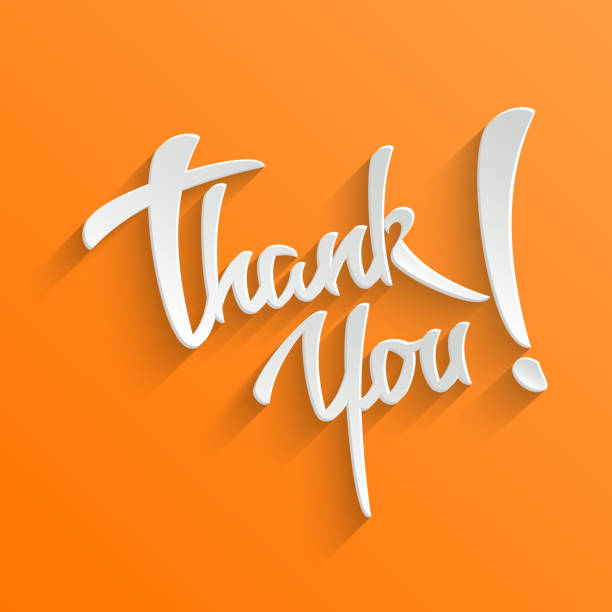